In [1]:
from keras.datasets import mnist

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import cv2


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.optimizers import Adam, RMSprop 
from keras.utils.np_utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print('no of trainnig images',x_train.shape[0])
print('no of trainnig labels',y_train.shape[0])

print('w X h of trainnig images',x_train.shape[1:])
print('w X h of testing images',x_test.shape[1:])

print('\ntraining_input___________________________: x_train.shape = ', x_train.shape)
print('labels___________________________________: y_train.shape = ', y_train.shape) 


no of trainnig images 60000
no of trainnig labels 60000
w X h of trainnig images (28, 28)
w X h of testing images (28, 28)

training_input___________________________: x_train.shape =  (60000, 28, 28)
labels___________________________________: y_train.shape =  (60000,)


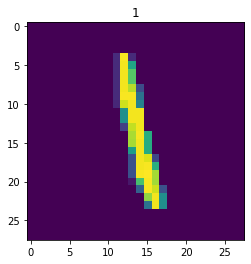

In [8]:
plt.imshow(x_train[104])
plt.title(y_train[104])
plt.show()

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

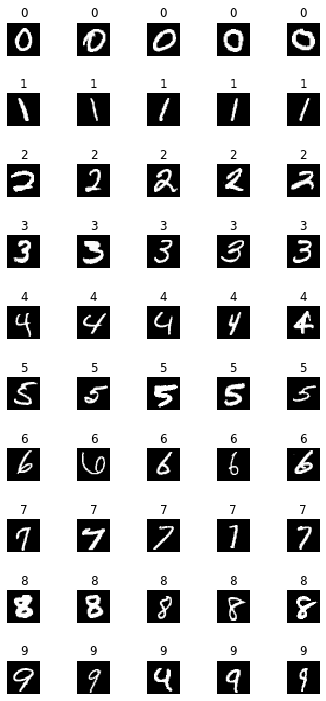

In [ ]:
n_cols = 5
n_classes = 10
fig, axes = plt.subplots(n_classes,n_cols, figsize=(5, 10))
fig.tight_layout()


for i in range(n_cols):
  for j in range(n_classes):
    slected_images = x_train[y_train == j]  # <-- select x_train but at y_train = j
    image = slected_images[random.randint(0, len(slected_images)-1), :, :]  
    axes[j][i].imshow(image, cmap='gray')  
    axes[j][i].axis('off')
    #axes[j][i].set_title(y_train[image])
    axes[j][i].set_title(str(j))
  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape


(60000,)

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 


In [14]:
x_train = x_train/255
X_test = x_test/255

In [15]:
# CONVOLUTIONAL NEURAL NETWORK

In [16]:
model = Sequential() 

model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu'))  # 
model.add(MaxPooling2D(pool_size=(2,2) ))

model.add(Conv2D(64, (3,3), activation='relu'))  # 
model.add(MaxPooling2D(pool_size=(2,2) ))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dense(387, activation='relu'))
model.add(Dense(10, activation='softmax')) 
model.compile(RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
h = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 42s 7ms/step - loss: 0.6683 - accuracy: 0.8251 - val_loss: 12.8801 - val_accuracy: 0.9697
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1003 - accuracy: 0.9698 - val_loss: 8.1745 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 8.0023 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 7.6305 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 5.4033 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 7.2370 - val_accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0337 - accuracy: 0.9901 - val_loss: 6.5793 - val_a

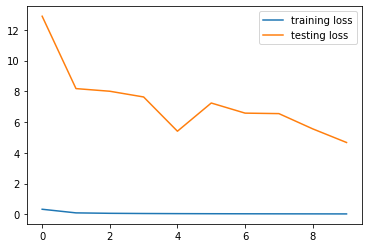

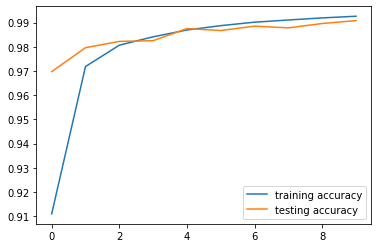

In [19]:
plt.plot(h.history['loss'], label='training loss')
plt.plot(h.history['val_loss'], label='testing loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='training accuracy')
plt.plot(h.history['val_accuracy'], label='testing accuracy')
plt.legend()
plt.show()

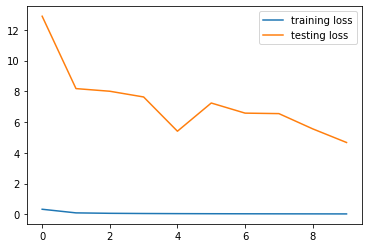

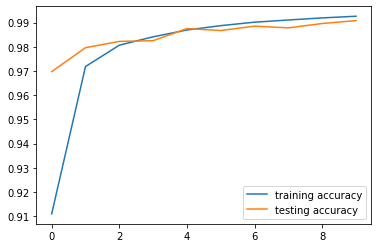

In [21]:
# at 87% accuracy
plt.plot(h.history['loss'], label='training loss')
plt.plot(h.history['val_loss'], label='testing loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='training accuracy')
plt.plot(h.history['val_accuracy'], label='testing accuracy')
plt.legend()
plt.show()

In [22]:
model.save('digit_model.h5')

In [23]:
from google.colab import files
files.download('digit_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
model.predict(x_test)[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred = model.predict(x_test)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.6704 - accuracy: 0.9908


[4.670400142669678, 0.9908000230789185]

In [ ]:
####################################################################################################################################################
#############################################################################################################################